### <p style="text-align: right;"> Alexis Guevara

#### First-Order System of DEs (Van der Pol Oscillator) 



==== Modeling dx/dt ====

# === Lasso-selected coefficients ===
('v_t_0', 0.951969)
('v_t_1', 0.018571)
('v_t_2', 0.018152)
('x_t_0*x_t_0', 0.001103)
('x_t_1*x_t_1', 0.000274)
('v_t_2*v_t_2', -0.001017)
('x_t_0*x_t_1*x_t_2', -0.000203)
('x_t_0*x_t_2*x_t_2', -0.000302)
('x_t_0*v_t_2*v_t_2', -0.000476)
('v_t_0*v_t_0*v_t_0', 0.002239)
('v_t_0*x_t_1*v_t_1', -0.000559)
('v_t_0*x_t_1*v_t_2', -0.001646)
('x_t_1*x_t_1*x_t_1', -0.000154)
('x_t_1*x_t_1*x_t_2', -0.000260)
('x_t_1*v_t_1*v_t_2', -0.001327)
('x_t_1*x_t_2*x_t_2', -0.000133)
('x_t_1*v_t_2*v_t_2', -0.001827)
('v_t_1*v_t_1*v_t_1', 0.000409)
('x_t_2*x_t_2*x_t_2', -0.000095)
('x_t_2*v_t_2*v_t_2', -0.000782)

# === OLS-refitted coefficients ===
('v_t_0', 8.026568)
('v_t_1', -14.066270)
('v_t_2', 7.031926)
('x_t_0*x_t_0', 0.001761)
('v_t_2*v_t_2', -0.000840)
('x_t_0*x_t_1*x_t_2', 20.976155)
('v_t_0*v_t_0*v_t_0', 0.002235)
('v_t_0*x_t_1*v_t_1', 0.055730)
('v_t_0*x_t_1*v_t_2', -0.056901)
('x_t_1*x_t_1*x_t_1', -20.976769)


==== Modeling dv/

C:\Users\alexi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.608e+01, tolerance: 5.059e+00
  model = cd_fast.enet_coordinate_descent(



# === Lasso-selected coefficients ===
('x_t_0', -0.900223)
('v_t_1', 0.466724)
('v_t_2', 1.179660)
('x_t_0*v_t_2', 0.011214)
('v_t_0*v_t_0', -0.020445)
('x_t_0*x_t_0*v_t_0', -1.233765)
('x_t_0*v_t_0*v_t_0', 0.205359)
('x_t_0*v_t_0*x_t_1', -0.287485)
('x_t_0*v_t_2*v_t_2', -0.217859)
('v_t_0*v_t_0*v_t_0', 0.143604)
('v_t_0*v_t_0*v_t_2', -0.001986)
('v_t_0*x_t_1*x_t_1', -0.274880)
('v_t_0*x_t_1*x_t_2', -0.015161)
('v_t_0*v_t_1*v_t_2', -0.019255)
('v_t_0*v_t_2*v_t_2', -0.037035)
('x_t_1*x_t_1*x_t_1', -0.004193)
('x_t_1*x_t_1*x_t_2', -0.000068)
('x_t_1*x_t_2*x_t_2', -0.000089)
('x_t_1*v_t_2*v_t_2', -0.178687)
('v_t_1*v_t_2*v_t_2', -0.001686)
('x_t_2*v_t_2*v_t_2', -0.002589)
('v_t_2*v_t_2*v_t_2', -0.026250)

# === OLS-refitted coefficients ===
('v_t_1', -99.164506)
('v_t_2', 99.176129)
('x_t_0*v_t_2', -0.004154)
('v_t_0*v_t_0', 0.002025)
('x_t_0*v_t_0*v_t_0', 0.663612)
('x_t_0*v_t_0*x_t_1', 76.395084)
('x_t_0*v_t_2*v_t_2', 0.149957)
('v_t_0*x_t_1*x_t_1', -77.567880)
('x_t_1*x_t_1*x_t_1', -5

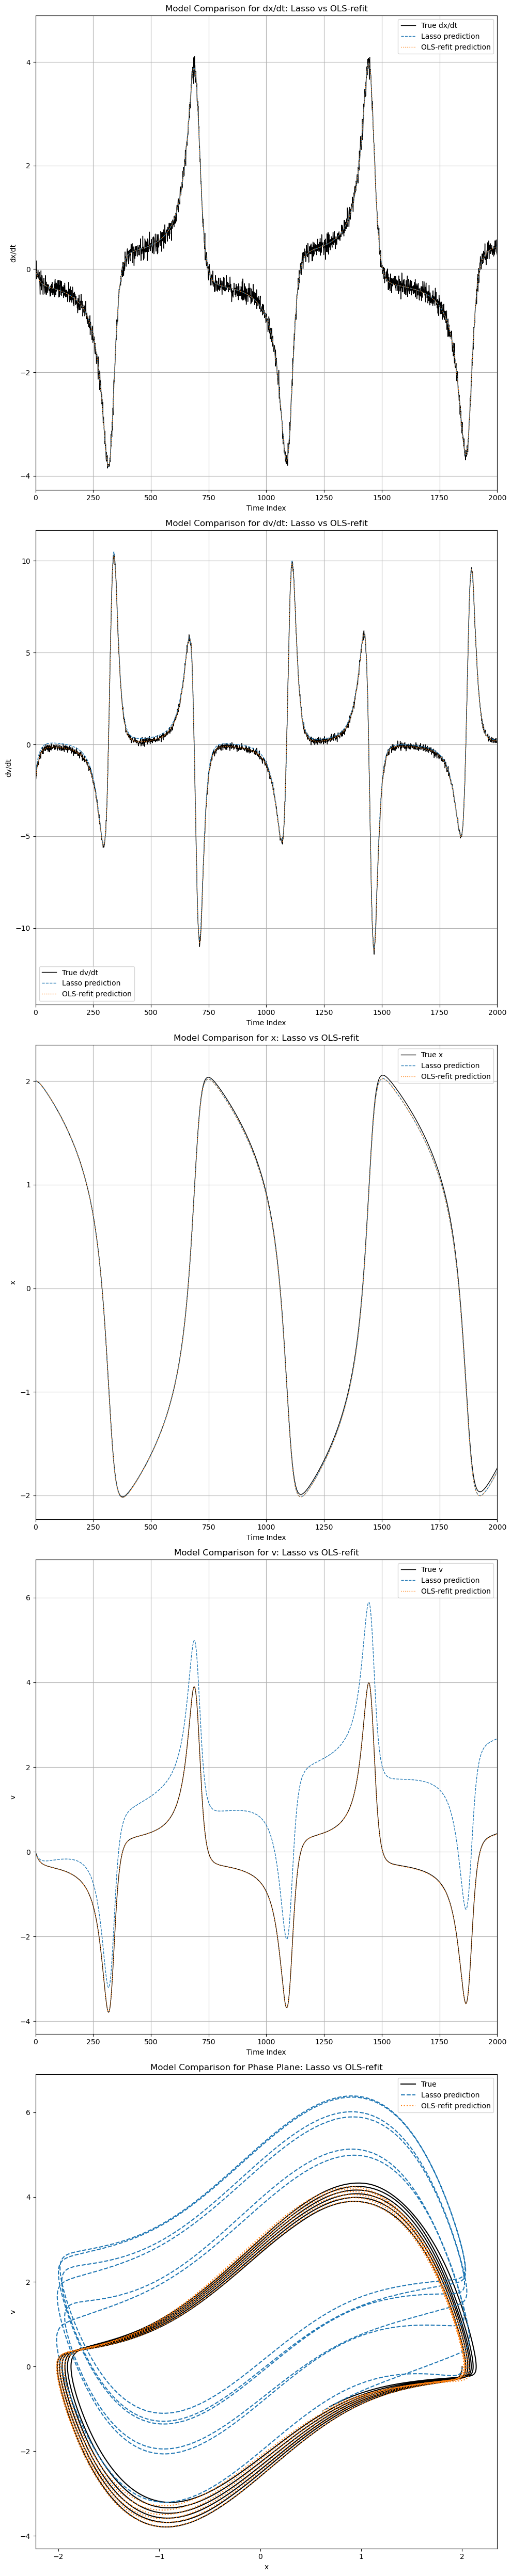

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from itertools import combinations_with_replacement


# 1. Simulate the Van der Pol system
def van_der_pol_forcing(t, y, mu, C, D):
    x, v = y
    dxdt = v
    dvdt = mu * (1 - x**2) * v - x + C * t + D * np.sin(t)
    return [dxdt, dvdt]

mu, C, D = 2, 0.01, 0
t_eval = np.linspace(0, 50, 5001)
sol = solve_ivp(van_der_pol_forcing, (0,50), [2.0, 0.0], args=(mu, C, D), t_eval=t_eval)
time, x, v = sol.t, sol.y[0], sol.y[1]


# 2. Compute true derivatives
dxdt_true = v
dvdt_true = mu * (1 - x**2) * v - x + C * time + D * np.sin(time)


# 3. Calculate approximate derivatives using forward Euler method
dt = time[1] - time[0]
dxdt_euler = np.diff(x)/dt
dvdt_euler = np.diff(v)/dt

# Add noise to approximated derivatives
np.random.seed(0)
dxdt_euler += np.random.normal(0, 0.1, size=dxdt_euler.shape)
dvdt_euler += np.random.normal(0, 0.1, size=dvdt_euler.shape)


# 4. Multivariate Takens' embedding of both x and v
def create_multivariate_embedding(x, v, tau, d):
    N = len(x) - (d - 1) * tau
    emb = np.zeros((N, 2*d))  # 2 variables (x and v) each with d delays
    for i in range(d):
        emb[:, 2*i]   = x[i*tau : i*tau + N]  # x delays
        emb[:, 2*i+1] = v[i*tau : i*tau + N]  # v delays
    return emb

tau = 1
embedding_dim = 3
degree = 3
threshold = 1e-5

embedding = create_multivariate_embedding(x, v, tau, embedding_dim)
embedding = embedding[:-1]  

dxdt_target = dxdt_euler[:len(embedding)]
dvdt_target = dvdt_euler[:len(embedding)]
x_true = x[:len(embedding)]
v_true = v[:len(embedding)]


# 5. Build polynomial feature matrix
poly = PolynomialFeatures(degree=degree, include_bias=True)
Theta = poly.fit_transform(embedding)


# 6. Generate input symbol names dynamically
input_symbols = []
for i in range(embedding_dim):
    input_symbols.append(f'x_t_{i*tau}')
    input_symbols.append(f'v_t_{i*tau}')

feature_names = ['1'] + [
    "*".join(comb)
    for deg in range(1, degree + 1)
    for comb in combinations_with_replacement(input_symbols, deg)
]


# 7. Function to perform modeling process
def model_derivative(Theta, target, feature_names, threshold, derivative_name):
    print(f"\n\n==== Modeling {derivative_name} ====")
    
    # Fit Lasso regression to recover a sparse model 
    lasso = Lasso(alpha=0.001, max_iter=10000).fit(Theta, target)

    # Display Lasso-selected features
    print("\n# === Lasso-selected coefficients ===")
    selected_idx = []
    for idx, coef in enumerate(lasso.coef_):
        if abs(coef) > threshold:
            print(f"('{feature_names[idx]}', {coef:.6f})")
            selected_idx.append(idx)
    
    # OLS + forward selection on Lasso-selected features
    def fit_ols_select(X, y, idxs):
        if len(idxs) <= 1:
            model = LinearRegression().fit(X[:, idxs], y)
            return model, np.array(idxs)
        sfs = SequentialFeatureSelector(
            LinearRegression(), direction='forward', scoring='r2', cv=5
        )
        sfs.fit(X[:, idxs], y)
        final_idxs = np.array(idxs)[sfs.get_support()]
        model = LinearRegression().fit(X[:, final_idxs], y)
        return model, final_idxs
    
    ols_model, final_idx = fit_ols_select(Theta, target, selected_idx)

    # Display OLS-refitted coefficients
    print("\n# === OLS-refitted coefficients ===")
    for i, idx in enumerate(final_idx):
        print(f"('{feature_names[idx]}', {ols_model.coef_[i]:.6f})")
    
    return lasso, ols_model, final_idx

# Model derivatives
lasso_dxdt, ols_dxdt, final_idx_dxdt = model_derivative(Theta, dxdt_target, feature_names, threshold, 'dx/dt')
lasso_dvdt, ols_dvdt, final_idx_dvdt = model_derivative(Theta, dvdt_target, feature_names, threshold, 'dv/dt')

# Compare Lasso vs OLS predictions
lasso_dxdt_pred = lasso_dxdt.predict(Theta)
ols_dxdt_pred = ols_dxdt.predict(Theta[:, final_idx_dxdt])
lasso_dvdt_pred = lasso_dvdt.predict(Theta)
ols_dvdt_pred = ols_dvdt.predict(Theta[:, final_idx_dvdt])


# 8. State prediction using current states
def predict_states(Theta, dxdt_model, dvdt_model, dxdt_idx, dvdt_idx, x0, v0, dt):
    N = len(Theta)
    x_pred = np.zeros(N+1)
    v_pred = np.zeros(N+1)
    x_pred[0], v_pred[0] = x0, v0
    
    # Initialize first point using the first embedded values
    x_pred[1], v_pred[1] = embedding[0,0], embedding[0,1]
    
    for i in range(1, N):
        # Get current features
        if isinstance(dxdt_model, LinearRegression):
            dxdt = dxdt_model.predict(Theta[i-1:i, dxdt_idx])[0]
        else:
            dxdt = dxdt_model.predict(Theta[i-1:i])[0]
            
        if isinstance(dvdt_model, LinearRegression):
            dvdt = dvdt_model.predict(Theta[i-1:i, dvdt_idx])[0]
        else:
            dvdt = dvdt_model.predict(Theta[i-1:i])[0]
        
        # Update states using forward Euler
        x_pred[i+1] = x_pred[i] + dxdt * dt
        v_pred[i+1] = v_pred[i] + dvdt * dt
    
    return x_pred[1:], v_pred[1:]  # Trim initial condition

# Calculate state predictions
x_pred_lasso, v_pred_lasso = predict_states(
    Theta, lasso_dxdt, lasso_dvdt, final_idx_dxdt, final_idx_dvdt, x[0], v[0], dt
)

x_pred_ols, v_pred_ols = predict_states(
    Theta, ols_dxdt, ols_dvdt, final_idx_dxdt, final_idx_dvdt, x[0], v[0], dt
)


# 8. Create all plots
plt.figure(figsize=(10, 50))

# Derivatives plots
plt.subplot(5, 1, 1)
plt.plot(dxdt_target, label='True dx/dt', color='black', lw=1)
plt.plot(lasso_dxdt_pred, label='Lasso prediction', linestyle='--', lw=1)
plt.plot(ols_dxdt_pred, label='OLS-refit prediction', linestyle=':', lw=1)
plt.xlabel('Time Index')
plt.ylabel('dx/dt')
plt.xlim(0, 2000)
plt.title('Model Comparison for dx/dt: Lasso vs OLS-refit')
plt.legend()
plt.grid()

plt.subplot(5, 1, 2)
plt.plot(dvdt_target, label='True dv/dt', color='black', lw=1)
plt.plot(lasso_dvdt_pred, label='Lasso prediction', linestyle='--', lw=1)
plt.plot(ols_dvdt_pred, label='OLS-refit prediction', linestyle=':', lw=1)
plt.xlabel('Time Index')
plt.ylabel('dv/dt')
plt.xlim(0, 2000)
plt.title('Model Comparison for dv/dt: Lasso vs OLS-refit')
plt.legend()
plt.grid()

# State variable plots
plt.subplot(5, 1, 3)
plt.plot(x_true, label='True x', color='black', lw=1)
plt.plot(x_pred_lasso, label='Lasso prediction', linestyle='--', lw=1)
plt.plot(x_pred_ols, label='OLS-refit prediction', linestyle=':', lw=1)
plt.xlabel('Time Index')
plt.ylabel('x')
plt.xlim(0, 2000)
plt.title('Model Comparison for x: Lasso vs OLS-refit')
plt.legend()
plt.grid()

plt.subplot(5, 1, 4)
plt.plot(v_true, label='True v', color='black', lw=1)
plt.plot(v_pred_lasso, label='Lasso prediction', linestyle='--', lw=1)
plt.plot(v_pred_ols, label='OLS-refit prediction', linestyle=':', lw=1)
plt.xlabel('Time Index')
plt.ylabel('v')
plt.xlim(0, 2000)
plt.title('Model Comparison for v: Lasso vs OLS-refit')
plt.legend()
plt.grid()

# Phase space plots
plt.subplot(5, 1, 5)
plt.plot(x_true, v_true, color='black', label='True')
plt.plot(x_pred_lasso, v_pred_lasso, label='Lasso prediction', linestyle='--')
plt.plot(x_pred_ols, v_pred_ols, label='OLS-refit prediction', linestyle=':')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Model Comparison for Phase Plane: Lasso vs OLS-refit')
plt.legend()

plt.tight_layout()
plt.show()